<a href="https://colab.research.google.com/github/vivekkishore/Pythonbasics/blob/main/meetingclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data Preprocessing

In [83]:
# import pandas as pd
# import numpy as np
# import seaborn
# import sklearn
# import matplotlib.pyplot as plt
# %matplotlib inline
# from pylab import rcParams
# rcParams['figure.figsize'] = 10, 8
# from sklearn.model_selection import train_test_split,RandomizedSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn import preprocessing
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree
# from sklearn.naive_bayes import GaussianNB, MultinomialNB
# from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score
# import scikitplot
# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
# df=pd.read_excel('meetingtype.xlsx')
# df.head()


In [65]:
import spacy
import string
import gensim
import operator
import re
from spacy.lang.en.stop_words import STOP_WORDS
spacy_nlp = spacy.load('en_core_web_sm')

def spacy_processor(sentence):

    punctuations = string.punctuation
    stop_words = STOP_WORDS
    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits and words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)

    #creating token object
    tokens = spacy_nlp(sentence)

    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() for word in tokens]

    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]

    sent=' '.join(tokens)

    return sent


In [66]:
X=df['meeting details']
Y=df['meeting type']
X = X.map(lambda x: spacy_processor(x))
X.head()

0    new digital content form discussion explain us...
1    migration shibboleth saml discuss technical qu...
2    glr discussion meet minute discuss query relat...
3    discussion sso progress schedule discuss updat...
4    learn balance idea use value forms minute bite...
Name: meeting details, dtype: object

###Model training and eval

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
# text_clf = text_clf.fit(X_train, y_train)

n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search,scoring='accuracy')

gs_clf = gs_clf.fit(X_train, y_train)

y_pred=gs_clf.predict(X_test)

In [87]:
print(accuracy_score(y_test,y_pred))

0.6842105263157895


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

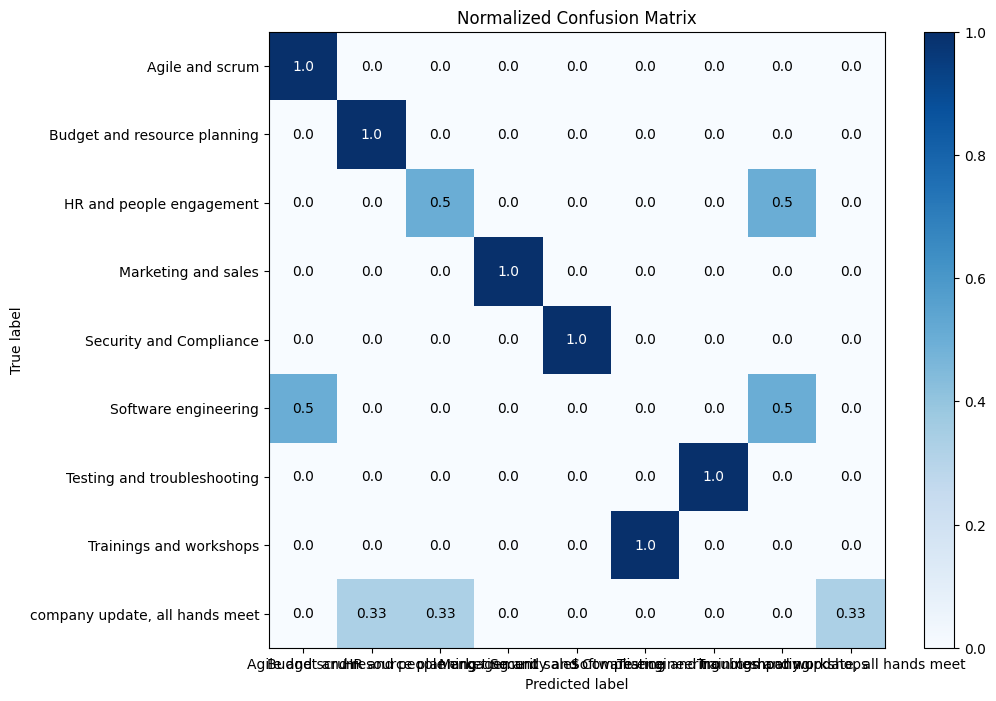

In [88]:
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

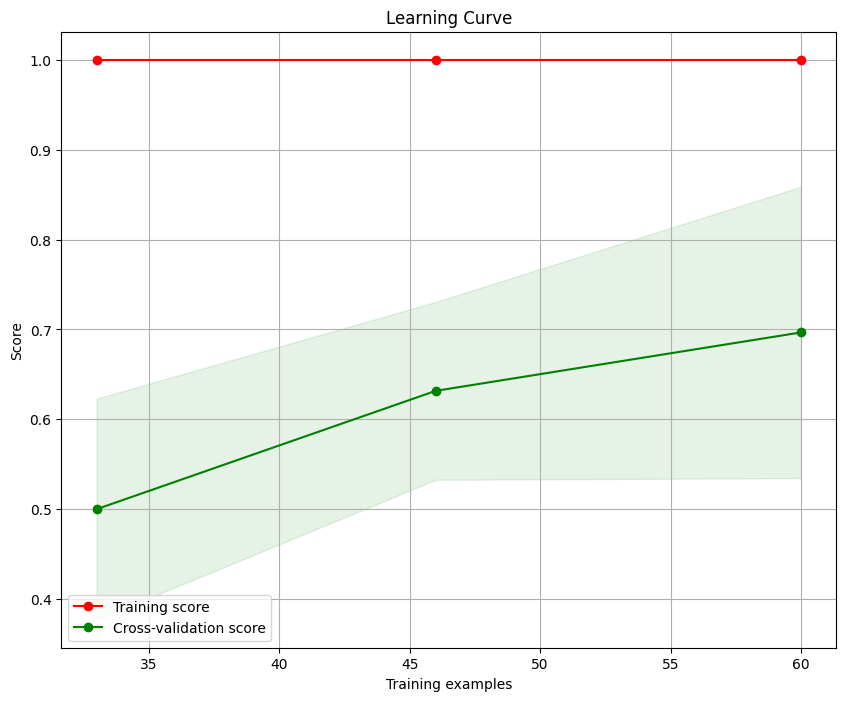

In [89]:
scikitplot.estimators.plot_learning_curve(gs_clf,X_train,y_train)